In [3]:
import os
os.getcwd()

'C:\\Users\\kushi\\OneDrive\\Desktop\\iGebra.ai\\cognitive_dashboard\\notebook'

In [4]:
# Cell / script: generate synthetic student data

import numpy as np
import pandas as pd
from faker import Faker
import random

# (Optionally) set random seeds for reproducibility
random.seed(42)
np.random.seed(42)

fake = Faker()

# Number of students you want
N = 800  # you can change to e.g. 500, 1000 etc.

# Generate student IDs
student_id = [f"S{1000 + i}" for i in range(N)]

# Generate names
names = [fake.name() for _ in range(N)]

# Generate class/groups
classes = np.random.choice(["A", "B", "C"], size=N, p=[0.4, 0.35, 0.25])
# You can adjust class labels and probabilities

# Generate cognitive skill features — numbers between 0-100
# Use distributions so that not all students are similar

comprehension = np.clip(np.random.normal(loc=70, scale=12, size=N), 30, 100)
attention    = np.clip(np.random.normal(loc=65, scale=15, size=N), 15, 100)
focus        = np.clip(np.random.normal(loc=60, scale=18, size=N), 10, 100)
retention    = np.clip(np.random.normal(loc=62, scale=14, size=N), 20, 100)

# Engagement time — how many minutes student spent engaged / active
# Could use an exponential or uniform distribution
engagement_time = np.clip(np.random.exponential(scale=30, size=N), 0, 180)
# (e.g., most students small, few spend long time)

# Build assessment_score: weighted sum + noise
# Adjust weights to reflect how much each skill should contribute

noise = np.random.normal(loc=0, scale=6, size=N)  # scale of noise

assessment_score = (
    0.30 * comprehension
  + 0.25 * attention
  + 0.20 * focus
  + 0.15 * retention
  + 0.05 * (engagement_time / 2)  # engagement scaled down
  + noise
)

# Clip to 0-100
assessment_score = np.clip(assessment_score, 0, 100)

# Round numeric features for neatness
comprehension = np.round(comprehension, 1)
attention = np.round(attention, 1)
focus = np.round(focus, 1)
retention = np.round(retention, 1)
engagement_time = np.round(engagement_time, 1)
assessment_score = np.round(assessment_score, 1)

# Make DataFrame
df = pd.DataFrame({
    "student_id": student_id,
    "name": names,
    "class": classes,
    "comprehension": comprehension,
    "attention": attention,
    "focus": focus,
    "retention": retention,
    "engagement_time": engagement_time,
    "assessment_score": assessment_score
})

# Save to CSV
df.to_csv("students_synthetic.csv", index=False)

print("Dataset generated:", df.shape)
print(df.head())


Dataset generated: (800, 9)
  student_id             name class  comprehension  attention  focus  \
0      S1000    Amanda Strong     A           60.5       73.1   53.5   
1      S1001       Joy Zavala     C           75.7       81.1   48.3   
2      S1002     Maria Holden     B           92.6       59.5   73.4   
3      S1003   Mary Rodriguez     B           86.1       52.4   56.7   
4      S1004  Tanner Valencia     A           89.1       49.3   48.3   

   retention  engagement_time  assessment_score  
0       78.8             88.6              68.3  
1       55.5              4.6              72.2  
2       56.2             43.3              71.9  
3       78.2              3.5              69.1  
4       35.8            119.3              53.6  


In [5]:
import pandas as pd
df = pd.read_csv("students_synthetic.csv")
df.head()


,student_id,name,class,comprehension,attention,focus,retention,engagement_time,assessment_score
0,S1000,Amanda Strong,A,60.5,73.1,53.5,78.8,88.6,68.3
1,S1001,Joy Zavala,C,75.7,81.1,48.3,55.5,4.6,72.2
2,S1002,Maria Holden,B,92.6,59.5,73.4,56.2,43.3,71.9
3,S1003,Mary Rodriguez,B,86.1,52.4,56.7,78.2,3.5,69.1
4,S1004,Tanner Valencia,A,89.1,49.3,48.3,35.8,119.3,53.6


In [6]:
# Cell: load data & inspect
import pandas as pd

# adjust path if needed
df = pd.read_csv("students_synthetic.csv")
# or if you moved it: df = pd.read_csv("data_generation/students_synthetic.csv")

# Check top rows
df.head()

# Shape (rows, columns)
print("Shape:", df.shape)

# Column info: types, non-null counts
df.info()

# Summary statistics for numeric columns
df.describe().T


Shape: (800, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        800 non-null    object 
 1   name              800 non-null    object 
 2   class             800 non-null    object 
 3   comprehension     800 non-null    float64
 4   attention         800 non-null    float64
 5   focus             800 non-null    float64
 6   retention         800 non-null    float64
 7   engagement_time   800 non-null    float64
 8   assessment_score  800 non-null    float64
dtypes: float64(6), object(3)
memory usage: 56.4+ KB


,count,mean,std,min,25%,50%,75%,max
comprehension,800.0,70.858250,11.938133,35.2,62.700,70.70,78.500,100.0
attention,800.0,65.400500,14.621401,19.7,55.900,65.00,75.100,100.0
focus,800.0,60.067375,17.559160,10.0,48.300,60.10,72.200,100.0
retention,800.0,61.811000,14.306667,21.0,51.475,62.15,71.500,100.0
engagement_time,800.0,29.559375,29.087436,0.0,9.000,19.80,40.525,180.0
assessment_score,800.0,59.679250,8.685401,32.3,53.800,59.60,65.700,91.6


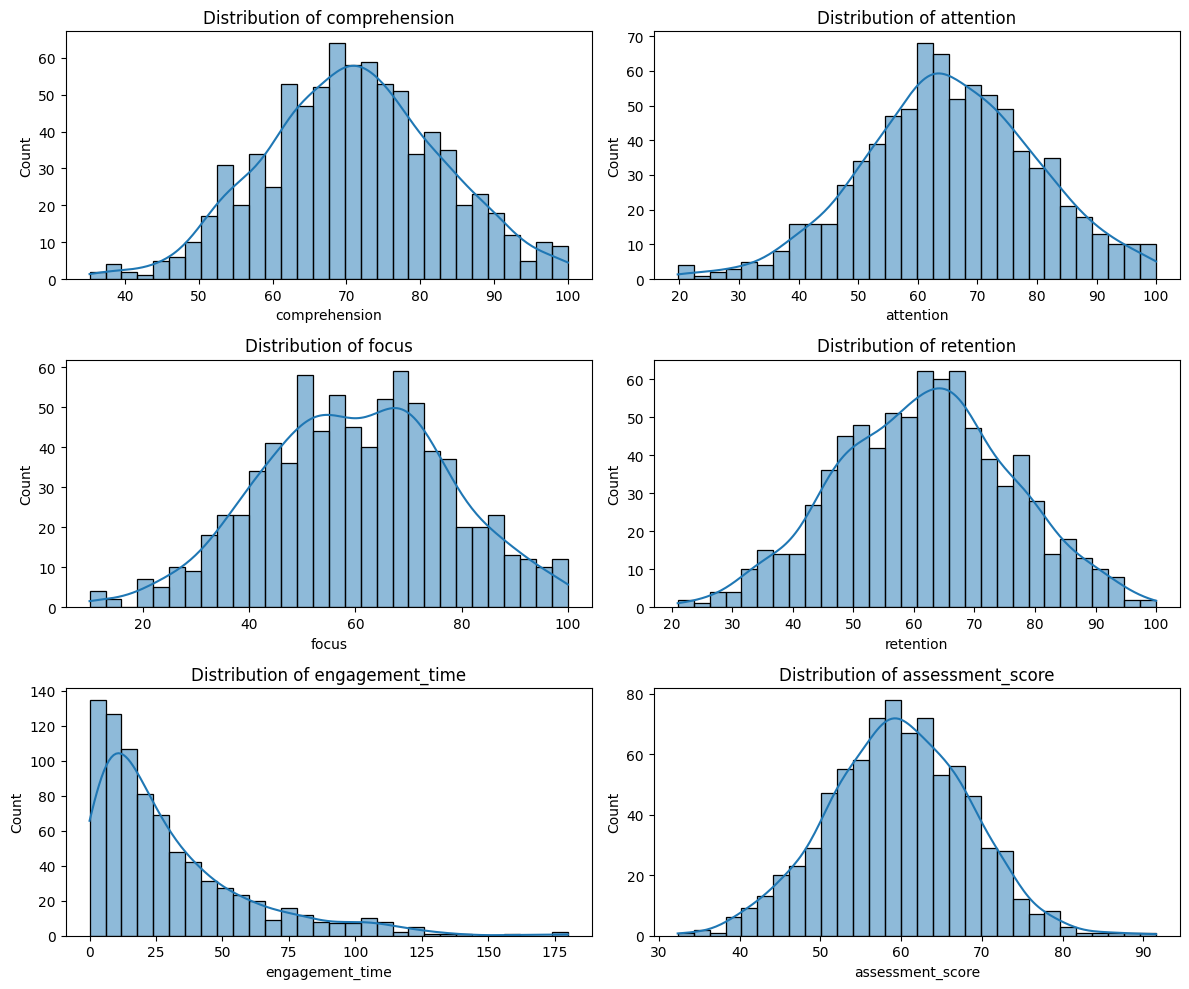

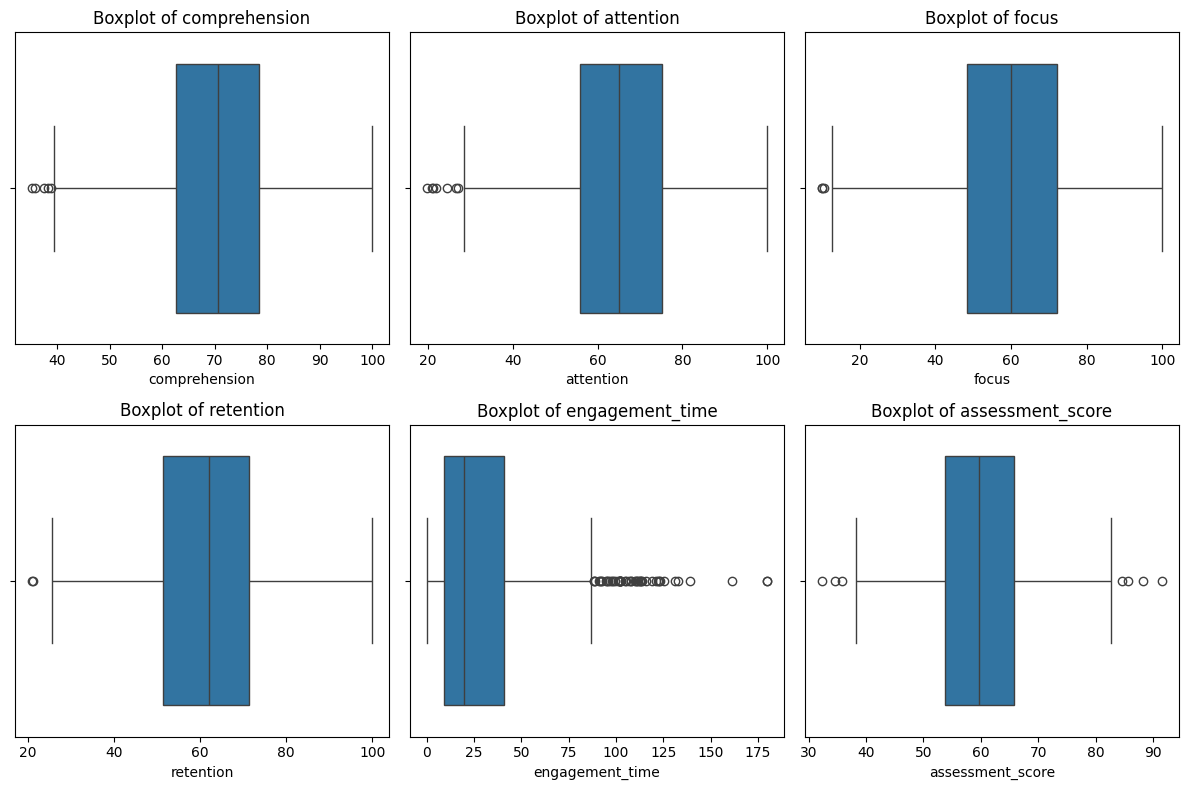

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['comprehension','attention','focus','retention','engagement_time','assessment_score']

# Histograms + KDEs
plt.figure(figsize=(12,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3,2,i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Boxplots for outliers
plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2,3,i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


Pearson correlation matrix:
                  comprehension  attention  focus  retention  engagement_time  \
comprehension              1.00      -0.00  -0.02      -0.01            -0.04   
attention                 -0.00       1.00   0.00      -0.00            -0.01   
focus                     -0.02       0.00   1.00      -0.02             0.02   
retention                 -0.01      -0.00  -0.02       1.00            -0.01   
engagement_time           -0.04      -0.01   0.02      -0.01             1.00   
assessment_score           0.39       0.38   0.41       0.25             0.04   

                  assessment_score  
comprehension                 0.39  
attention                     0.38  
focus                         0.41  
retention                     0.25  
engagement_time               0.04  
assessment_score              1.00  

Spearman correlation matrix:
                  comprehension  attention  focus  retention  engagement_time  \
comprehension              1.00   

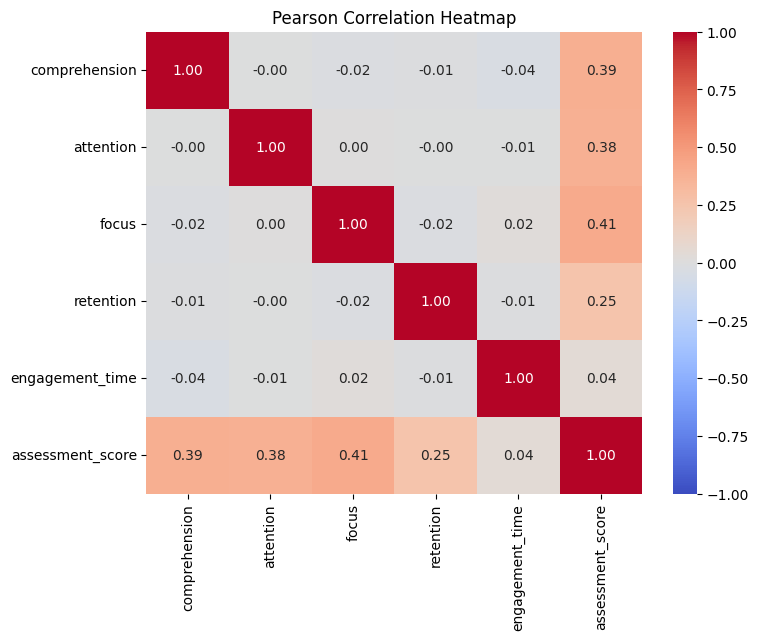

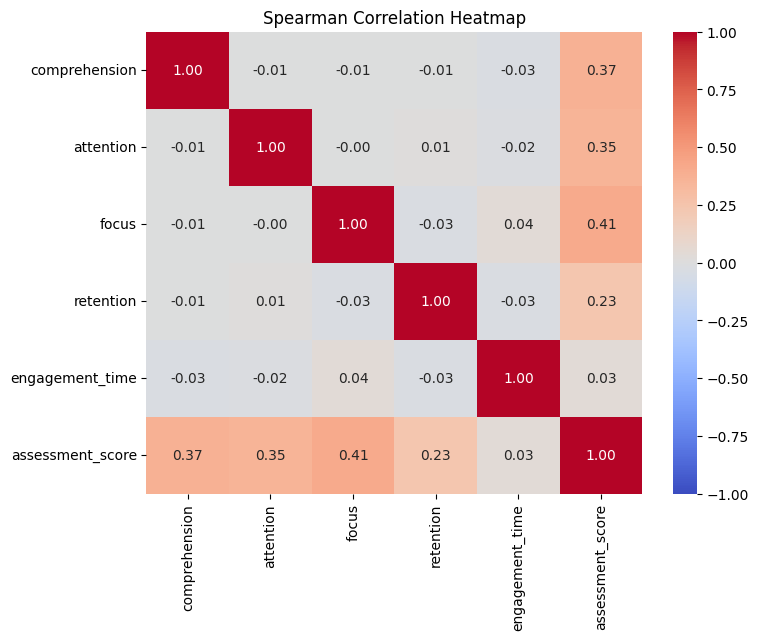

In [8]:
# Compute correlation matrices
pearson_corr = df[numeric_cols].corr(method='pearson')
spearman_corr = df[numeric_cols].corr(method='spearman')

# Display them
print("Pearson correlation matrix:")
print(pearson_corr.round(2))
print("\nSpearman correlation matrix:")
print(spearman_corr.round(2))

# Heatmap for Pearson
plt.figure(figsize=(8,6))
sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Pearson Correlation Heatmap")
plt.show()

# Heatmap for Spearman
plt.figure(figsize=(8,6))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Spearman Correlation Heatmap")
plt.show()


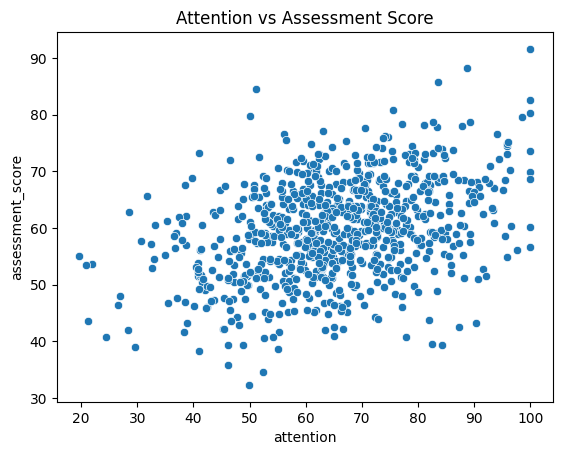

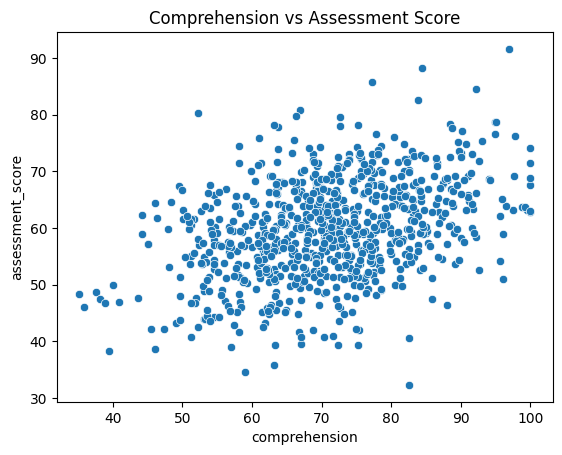

In [9]:
# Example: attention vs assessment_score
sns.scatterplot(data=df, x='attention', y='assessment_score')
plt.title("Attention vs Assessment Score")
plt.show()

# Maybe also comprehension vs assessment_score, focus vs assessment_score
sns.scatterplot(data=df, x='comprehension', y='assessment_score')
plt.title("Comprehension vs Assessment Score")
plt.show()


C:\Users\kushi\AppData\Local\Temp\ipykernel_16140\3110478665.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='assessment_score', data=df, ax=ax, palette='pastel')


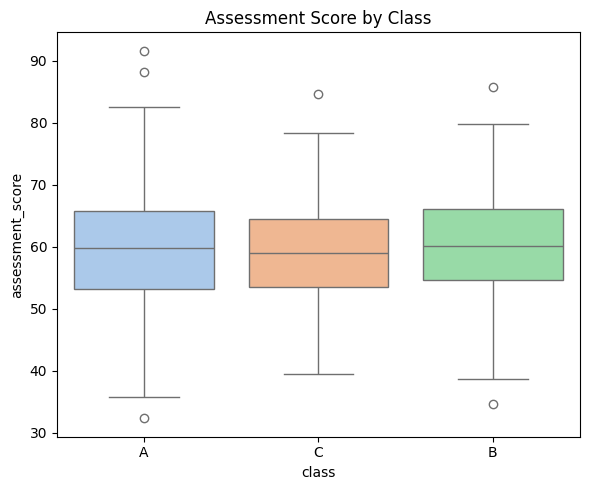

C:\Users\kushi\AppData\Local\Temp\ipykernel_16140\3110478665.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=col, data=df, ax=ax2, palette='Set2')


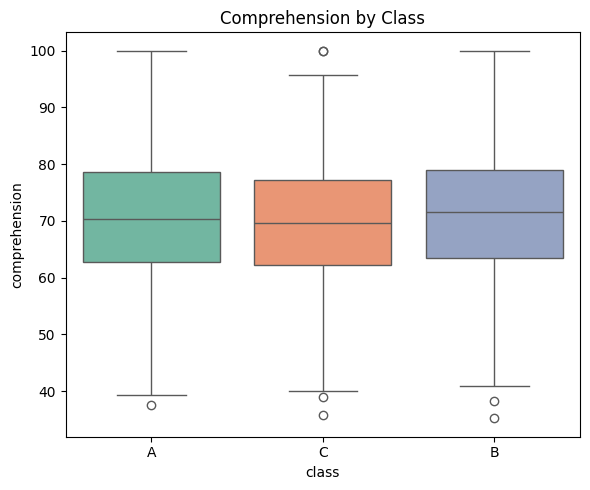

C:\Users\kushi\AppData\Local\Temp\ipykernel_16140\3110478665.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=col, data=df, ax=ax2, palette='Set2')


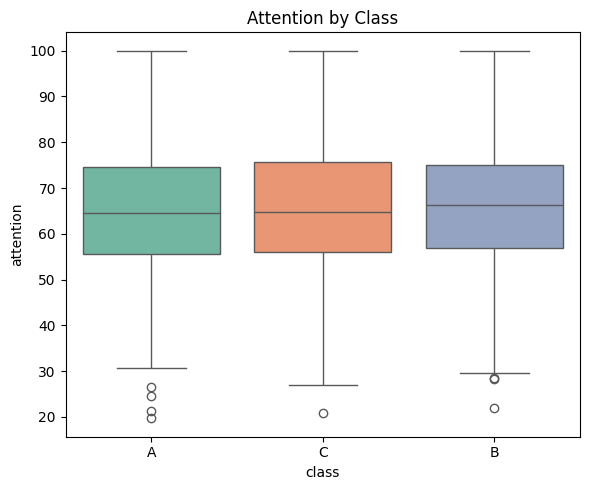

C:\Users\kushi\AppData\Local\Temp\ipykernel_16140\3110478665.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=col, data=df, ax=ax2, palette='Set2')


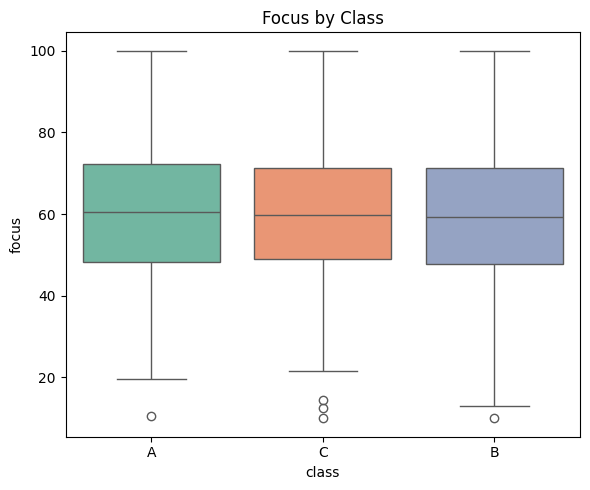

C:\Users\kushi\AppData\Local\Temp\ipykernel_16140\3110478665.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=col, data=df, ax=ax2, palette='Set2')


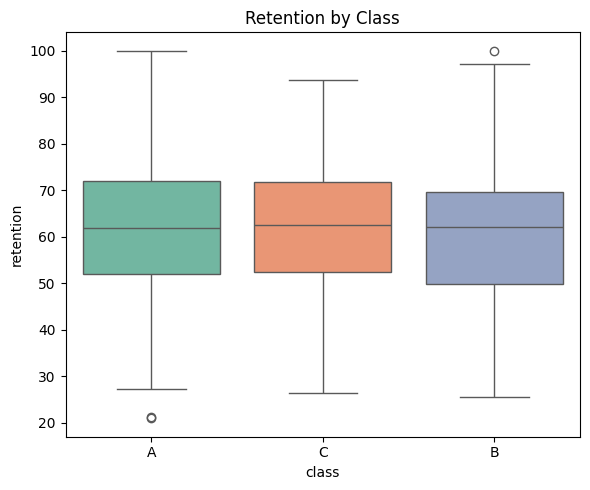

In [12]:
# Updated: Class-wise comparisons with safer plotting to avoid memory error

import matplotlib.pyplot as plt
import seaborn as sns
import gc  # garbage collector

# Plot: assessment by class
fig, ax = plt.subplots(figsize=(6,5))
sns.boxplot(x='class', y='assessment_score', data=df, ax=ax, palette='pastel')
ax.set_title("Assessment Score by Class")
plt.tight_layout()
plt.show()

# Close the figure
plt.close(fig)
gc.collect()

# Plot skills by class: in separate smaller plots (one per figure) to avoid big multi-subplot figure

skill_cols = ['comprehension','attention','focus','retention']
for col in skill_cols:
    fig2, ax2 = plt.subplots(figsize=(6,5))
    sns.boxplot(x='class', y=col, data=df, ax=ax2, palette='Set2')
    ax2.set_title(f"{col.capitalize()} by Class")
    plt.tight_layout()
    plt.show()
    plt.close(fig2)
    gc.collect()


In [11]:
# Students with very low or very high assessment scores
df.nlargest(5, 'assessment_score')[['student_id','name','assessment_score'] + numeric_cols]
df.nsmallest(5, 'assessment_score')[['student_id','name','assessment_score'] + numeric_cols]


,student_id,name,assessment_score,comprehension,attention,focus,retention,engagement_time,assessment_score
175,S1175,Francisco Brady,32.3,82.6,49.9,33.9,35.7,17.1,32.3
211,S1211,Susan Harper,34.6,59.0,52.3,41.6,33.6,9.7,34.6
734,S1734,Tammy Barnes,35.8,63.1,46.1,42.9,52.3,1.2,35.8
726,S1726,Gabriel Mcgee,38.2,39.4,41.0,61.5,31.5,51.8,38.2
632,S1632,Jennifer Price,38.6,46.1,55.1,40.1,68.2,43.6,38.6


In [13]:
# Cell 4.1: Prepare data for modeling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define feature columns and target
feature_cols = ['comprehension','attention','focus','retention','engagement_time']
target_col = 'assessment_score'

X = df[feature_cols]
y = df[target_col]

# Train-test split (20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features (important for linear regression especially)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

print("Training set size:", X_train.shape, "Test set size:", X_test.shape)


Training set size: (640, 5) Test set size: (160, 5)


In [14]:
# Cell 4.2: Baseline model: Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train_s, y_train)

y_pred_lr = lr.predict(X_test_s)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print(f"MAE: {mae_lr:.3f}")
print(f"RMSE: {rmse_lr:.3f}")
print(f"R²: {r2_lr:.3f}")

# Also inspect coefficients
coefs = lr.coef_
intercept = lr.intercept_
print("Intercept:", round(intercept,3))
for feat, coef in zip(feature_cols, coefs):
    print(f"  {feat}: {round(coef,3)}")


Linear Regression Performance:
MAE: 4.684
RMSE: 6.063
R²: 0.480
Intercept: 59.642
  comprehension: 3.376
  attention: 3.268
  focus: 3.909
  retention: 2.334
  engagement_time: 0.576


In [15]:
# Cell 4.3: Random Forest Regression

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Performance:")
print(f"MAE: {mae_rf:.3f}")
print(f"RMSE: {rmse_rf:.3f}")
print(f"R²: {r2_rf:.3f}")

# Feature importances
importances = rf.feature_importances_
for feat, imp in zip(feature_cols, importances):
    print(f"  {feat}: {round(imp,3)}")


Random Forest Regression Performance:
MAE: 4.994
RMSE: 6.465
R²: 0.408
  comprehension: 0.22
  attention: 0.238
  focus: 0.299
  retention: 0.155
  engagement_time: 0.088


In [16]:
# Cell 4.4: Cross-validation (optional, stronger evaluation)

from sklearn.model_selection import cross_val_score

# Use Linear Regression with cross-val
scores_lr = cross_val_score(
    lr, 
    scaler.transform(X),  # scale full data
    y, 
    cv=5, 
    scoring='r2'
)
print("Linear Regression 5-fold CV R² scores:", scores_lr)
print("Mean R²:", np.mean(scores_lr).round(3))

# Random Forest CV
scores_rf = cross_val_score(
    rf, X, y, cv=5, scoring='r2'
)
print("Random Forest 5-fold CV R² scores:", scores_rf)
print("Mean R²:", np.mean(scores_rf).round(3))


Linear Regression 5-fold CV R² scores: [0.53999485 0.46021952 0.50013375 0.56176311 0.56030703]
Mean R²: 0.524
Random Forest 5-fold CV R² scores: [0.48059261 0.38522171 0.4078238  0.48706139 0.47694147]
Mean R²: 0.448


                  comprehension  attention     focus  retention  \
comprehension          1.000000  -0.003009 -0.019132  -0.010739   
attention             -0.003009   1.000000  0.003566  -0.000730   
focus                 -0.019132   0.003566  1.000000  -0.019748   
retention             -0.010739  -0.000730 -0.019748   1.000000   
engagement_time       -0.038768  -0.007742  0.022135  -0.009215   
assessment_score       0.385142   0.377669  0.411668   0.253647   

                  engagement_time  assessment_score  
comprehension           -0.038768          0.385142  
attention               -0.007742          0.377669  
focus                    0.022135          0.411668  
retention               -0.009215          0.253647  
engagement_time          1.000000          0.041214  
assessment_score         0.041214          1.000000  


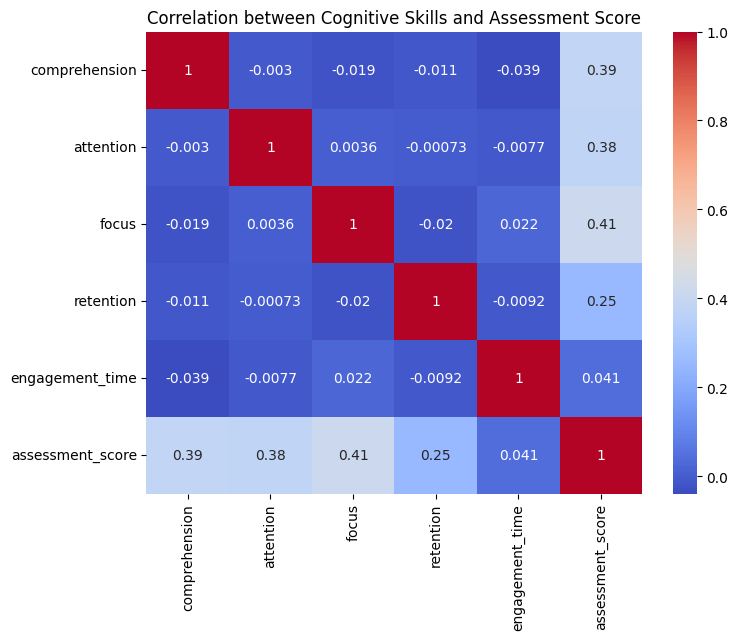

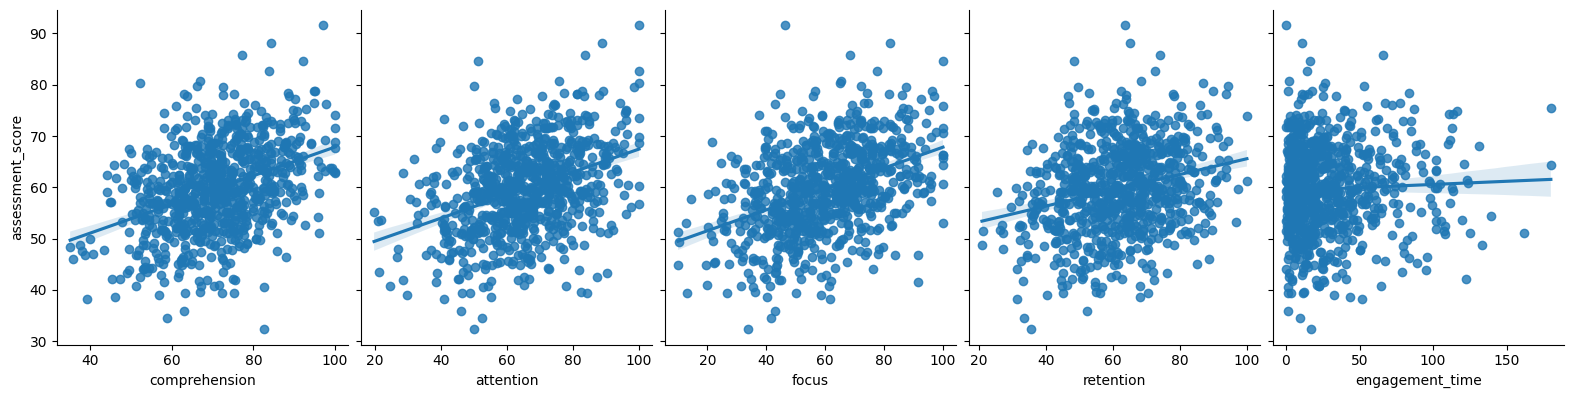

In [17]:
# Step 5: Correlation Analysis
skills_cols = ['comprehension','attention','focus','retention','engagement_time','assessment_score']

correlation_matrix = df[skills_cols].corr()
print(correlation_matrix)

# Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation between Cognitive Skills and Assessment Score")
plt.show()

# Optional: Pairplot
sns.pairplot(df, x_vars=['comprehension','attention','focus','retention','engagement_time'], 
             y_vars='assessment_score', height=4, aspect=0.8, kind='reg')
plt.show()


In [18]:
# Step 6: Feature Selection and ML Preparation

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# 1. Define Features and Target
X = df[['comprehension','attention','focus','retention','engagement_time']]
y = df['assessment_score']

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Evaluate Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# 5. Feature Importance / Coefficients
coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nFeature Coefficients:")
print(coeff_df)


Mean Squared Error: 36.76
R-squared Score: 0.48

Feature Coefficients:
           Feature  Coefficient
0    comprehension     0.286443
1        attention     0.225517
2            focus     0.217890
3        retention     0.161200
4  engagement_time     0.019495


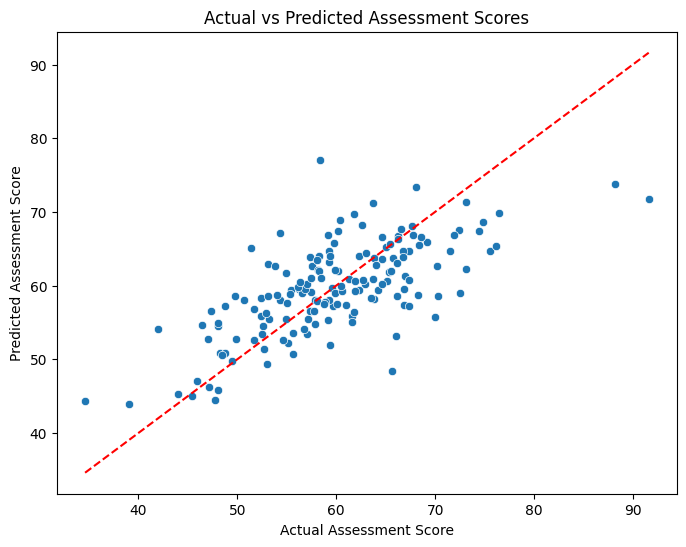

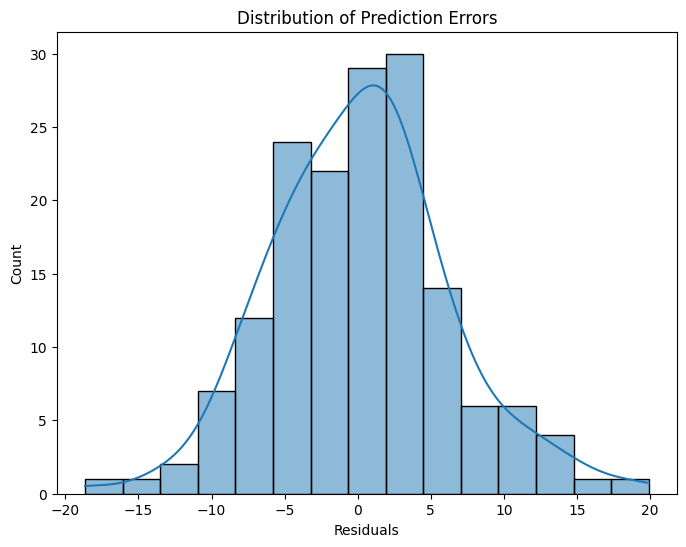

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Assessment Score")
plt.ylabel("Predicted Assessment Score")
plt.title("Actual vs Predicted Assessment Scores")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.show()

# Optional: Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, bins=15)
plt.xlabel("Residuals")
plt.title("Distribution of Prediction Errors")
plt.show()


In [24]:
# Step 8: Pretty Interactive Dashboard

from ipywidgets import interact, FloatSlider, VBox, HBox, Output, Label
import pandas as pd
from IPython.display import display

# Output widget for displaying the predicted score
out = Output()

# Function to predict and display assessment score
def predict_score(comprehension, attention, focus, retention, engagement_time):
    input_data = pd.DataFrame([[comprehension, attention, focus, retention, engagement_time]],
                              columns=['comprehension','attention','focus','retention','engagement_time'])
    predicted = model.predict(input_data)[0]
    
    with out:
        out.clear_output()
        print(f"🎯 Predicted Assessment Score: {predicted:.2f}")

# Create sliders
sliders = [
    VBox([Label("Comprehension"), FloatSlider(min=0, max=100, step=1, value=50)]),
    VBox([Label("Attention"), FloatSlider(min=0, max=100, step=1, value=50)]),
    VBox([Label("Focus"), FloatSlider(min=0, max=100, step=1, value=50)]),
    VBox([Label("Retention"), FloatSlider(min=0, max=100, step=1, value=50)]),
    VBox([Label("Engagement Time (hrs)"), FloatSlider(min=0, max=10, step=0.1, value=5)])
]

# Extract slider widgets for interact
slider_widgets = [s.children[1] for s in sliders]

# Link sliders with the predict function
interact(predict_score,
         comprehension=slider_widgets[0],
         attention=slider_widgets[1],
         focus=slider_widgets[2],
         retention=slider_widgets[3],
         engagement_time=slider_widgets[4])

# Display sliders in horizontal layout
display(HBox(sliders))
display(out)


interactive(children=(FloatSlider(value=50.0, description='comprehension', step=1.0), FloatSlider(value=50.0, …

Output()

Mean Squared Error: 36.7602207444291
R^2 Score: 0.4798241965976392


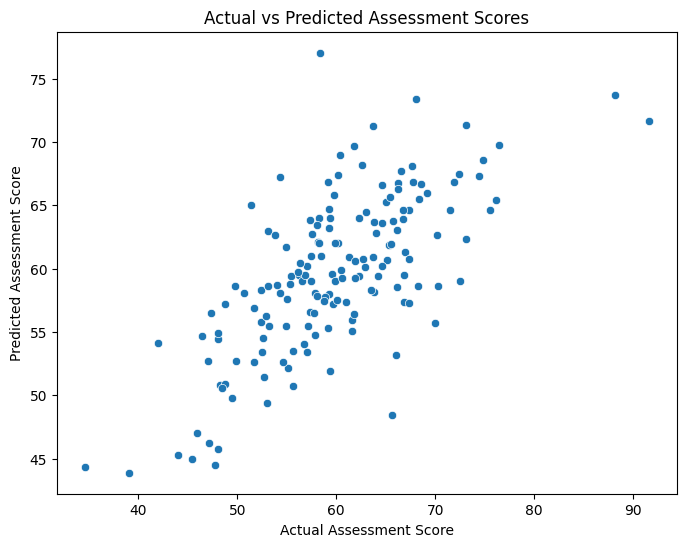

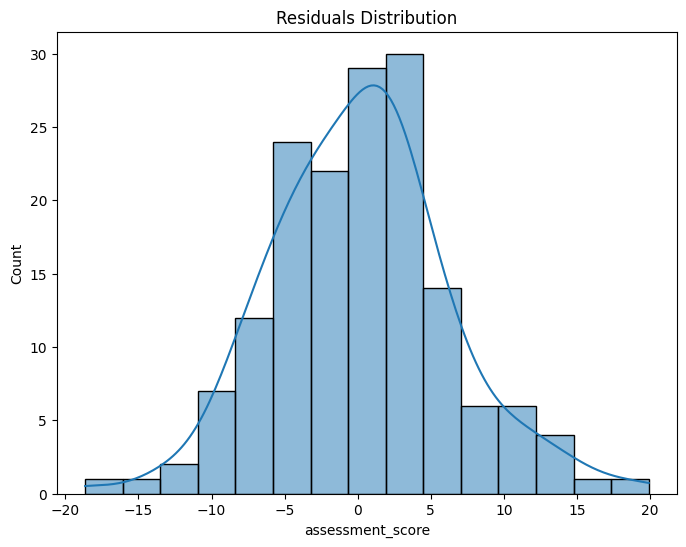

In [28]:
# Step 9: Model Evaluation & Visualization (All-in-One)

# 1. Predict on Test Data
y_pred = model.predict(X_test)

# 2. Evaluate Performance
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# 3. Visualize Predictions (Actual vs Predicted)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Assessment Score")
plt.ylabel("Predicted Assessment Score")
plt.title("Actual vs Predicted Assessment Scores")
plt.show()

# 4. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()


In [2]:
import pandas as pd

# Load your dataset
df = pd.read_csv("your_dataset.csv")  # replace with your file name

# Check first few rows
df.head()

# Export to JSON
df.to_json("students.json", orient="records")
print("students.json created!")


FileNotFoundError: [Errno 2] No such file or directory: 'your_dataset.csv'